In [14]:
from lineardsbeaformer import *

wave_data.shape (241793, 5)


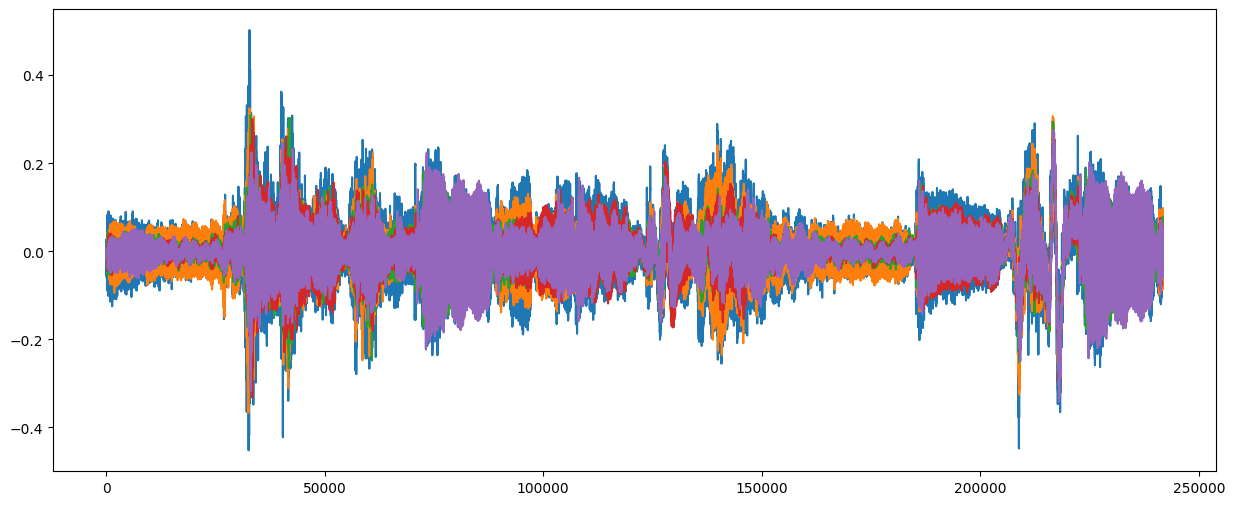

In [40]:
doa = 20  #声源传来的角度   clean的语音的角度  #根据不同的音频 需要自己修改

import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

wave_data, sr = sf.read('./dataset/mixture/clean_20_unsteadyNoise_10.wav')
if sr!=16000:
    wave_data = librosa.resample(wave_data, sr, 16000)
print(f'wave_data.shape {wave_data.shape}') # [T, C]
plt.figure(figsize=(15, 6))
plt.plot(wave_data)

In [16]:
wav_stft = []
for i in range(wave_data.shape[1]):
    wav_stft.append(librosa.stft(wave_data[:,i]))
wav_stft = np.array(wav_stft)
print(wav_stft.shape)

(5, 1025, 473)


(241664,)
(1025, 473)


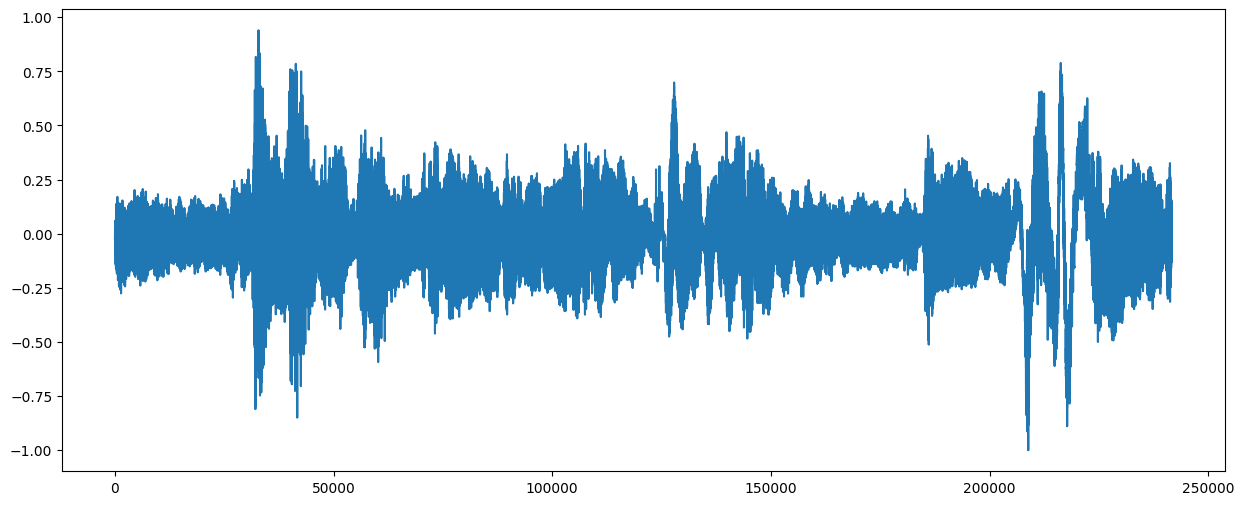

In [39]:
enh_stft = run(doa, wav_stft)
enh_wav = librosa.istft(enh_stft)
enh_wav = enh_wav / np.max(np.abs(enh_wav))
print(enh_wav.shape)
plt.figure(figsize=(15, 6))
plt.plot(enh_wav)

In [18]:

sf.write('./dataset/estimate/estimate_clean_20_unsteadyNoise_10.wav', enh_wav, samplerate=16000)